In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os
os.chdir("C:/Users/melkrewi/Desktop/shrimp/snRNAseq/drosophila_vs_artemia/")

In [4]:
gtf=pd.read_csv("Drosophila_melanogaster.BDGP6.95.gtf",sep="\t",header=None)
gtf_new=gtf[8].str.split(';',expand=True)
gtf_new_2=gtf_new[(gtf_new[0].str.contains('gene_id'))&(gtf_new[1].str.contains('transcript_id'))&(gtf_new[2].str.contains('gene_name'))][[0,1,2]]
gtf_new_2['transcript_id']=gtf_new_2[1].str[16:27]
gtf_new_2['gene_id']=gtf_new_2[0].str[9:20]
gtf_new_2['gene_name']=gtf_new_2[2].str[12:].replace({'"': ''}, regex=True)
gtf_new_2=gtf_new_2[['transcript_id','gene_id','gene_name']].drop_duplicates()

In [ ]:
f_vs_d_2.to_csv('f_vs_d_2_table.txt',sep='\t')

In [5]:
gtf_new_2[gtf_new_2['gene_name'].str.contains('fkh')]

,transcript_id,gene_id,gene_name
104813,FBtr0345227,FBgn0000659,fkh
104819,FBtr0300259,FBgn0000659,fkh
104825,FBtr0330333,FBgn0000659,fkh
104831,FBtr0346765,FBgn0000659,fkh
104837,FBtr0085321,FBgn0000659,fkh


In [15]:
#nature_markers
#drosophila_markers=pd.read_csv("nature_seurat_markers.txt",sep="\t")#,header=None)
#drosophila_markers['Gene']=drosophila_markers['gene']
#drosophila_markers['Cell Type']=drosophila_markers['cluster']
#drosophila_markers=drosophila_markers.drop('cluster',axis=1)

In [6]:
drosophila_markers=pd.read_csv("all_markers_drosophila.txt",sep="\t")
f_vs_d=pd.read_csv("dmel_vs_fran.blat.sorted.besthit",sep="\s+")
f_vs_d_2=pd.merge(f_vs_d,gtf_new_2,left_on='Tname',right_on='transcript_id')
f_vs_d_2['gene_name']=f_vs_d_2['gene_name'].str.lower()
drosophila_markers['Gene']=drosophila_markers['Gene'].str.lower()
drosophila_markers_2=pd.merge(f_vs_d_2,drosophila_markers,left_on='gene_name',right_on='Gene')
drosophila_markers_2['gene_a']=drosophila_markers_2['Qname'].str[:-2]
drosophila_markers_2=drosophila_markers_2[(drosophila_markers_2['FDR adjusted p-value']<0.05)&(drosophila_markers_2['Average_logFC']>0.5)]
artemia_markers=pd.read_csv("markers_all_7082.txt",sep="\s+")
##artemia_markers=pd.read_csv("markers_top100_cellbender_22_11_2022_06_02_7082.txt",sep="\s+")
artemia_markers=artemia_markers[(artemia_markers['p_val_adj']<0.05)&(artemia_markers['avg_log2FC']>0.5)]
drosophila_vs_artemia=pd.merge(artemia_markers,drosophila_markers_2,left_on='gene',right_on='gene_a')[['gene_a','Gene','cluster','Cell Type']]

In [24]:
average_expression=pd.read_csv("average_expression.txt",sep=" ")
average_expression_dmel=pd.read_csv("average_expression_dmel_nature.txt",sep=" ")
average_expression_dmel['gene']=average_expression_dmel['gene'].str.lower()

In [28]:
f_vs_d_3=f_vs_d_2[['Qname','gene_name']]
f_vs_d_3['Qname']=f_vs_d_3['Qname'].str[:-2]

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
average_expression_merged=pd.merge(average_expression,f_vs_d_3,left_on='gene',right_on='Qname')
average_expression_merged_2=pd.merge(average_expression_merged,average_expression_dmel,left_on='gene_name',right_on='gene').drop(['Qname','gene_name','gene_y','gene_x'],axis=1)


In [33]:
average_expression_merged_2.columns

Index(['gene_x', 'RNA.0_x', 'RNA.1_x', 'RNA.2_x', 'RNA.3_x', 'RNA.4_x',
       'RNA.5_x', 'RNA.6_x', 'RNA.7_x', 'RNA.8_x', 'RNA.9_x', 'RNA.10_x',
       'RNA.11_x', 'RNA.12_x', 'RNA.13_x', 'RNA.14_x', 'RNA.15', 'RNA.16',
       'RNA.17', 'Qname', 'gene_name', 'gene_y', 'RNA.0_y', 'RNA.1_y',
       'RNA.2_y', 'RNA.3_y', 'RNA.4_y', 'RNA.5_y', 'RNA.6_y', 'RNA.7_y',
       'RNA.8_y', 'RNA.9_y', 'RNA.10_y', 'RNA.11_y', 'RNA.12_y', 'RNA.13_y',
       'RNA.14_y'],
      dtype='object')

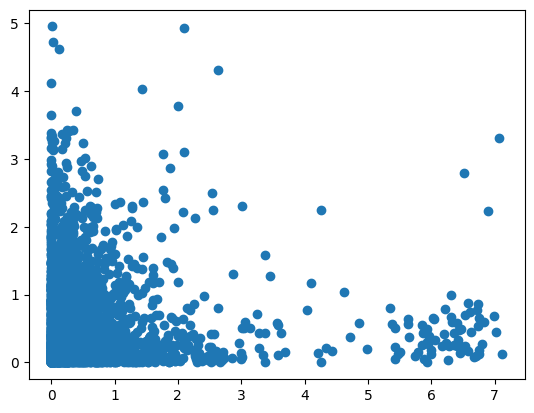

In [19]:
plt.scatter(np.log2(average_expression_merged['RNA.0_y']+1),np.log2(average_expression_merged['RNA.1_x']+1))

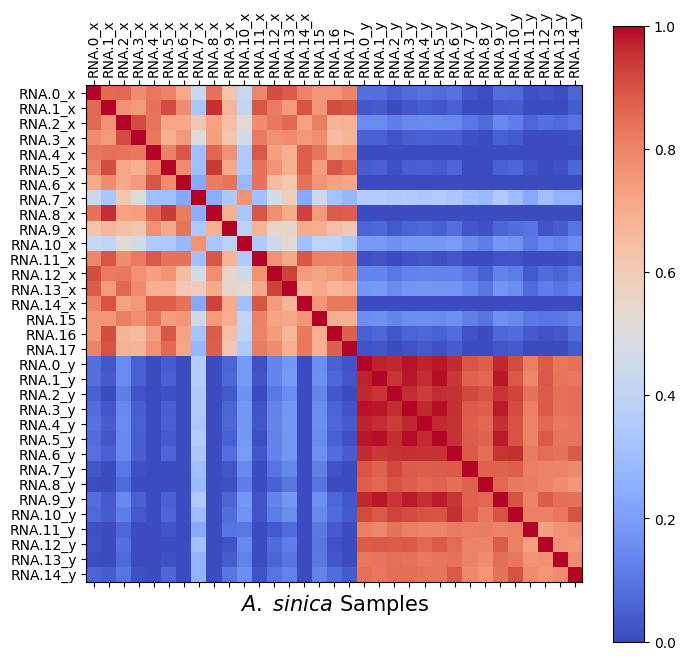

In [35]:
corr = average_expression_merged_2.corr(method='spearman')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.xlabel('$\it{A.}$ $\it{sinica}$ Samples',fontsize=15)
plt.savefig('correlation_sinica.png',bbox_inches='tight')
#plt.show()

In [36]:
corr

,RNA.0_x,RNA.1_x,RNA.2_x,RNA.3_x,RNA.4_x,RNA.5_x,RNA.6_x,RNA.7_x,RNA.8_x,RNA.9_x,...,RNA.5_y,RNA.6_y,RNA.7_y,RNA.8_y,RNA.9_y,RNA.10_y,RNA.11_y,RNA.12_y,RNA.13_y,RNA.14_y
RNA.0_x,1.000000,0.854218,0.858523,0.777818,0.825621,0.802853,0.703902,0.435556,0.836792,0.627903,...,0.076611,0.088914,0.027246,0.004941,0.078731,0.068876,0.009860,0.018526,0.007323,0.056279
RNA.1_x,0.854218,1.000000,0.766932,0.747800,0.839092,0.907012,0.778738,0.333497,0.954093,0.669088,...,0.025124,0.048436,-0.017013,-0.033379,0.037300,0.042470,-0.011208,-0.015511,-0.005829,0.040924
RNA.2_x,0.858523,0.766932,1.000000,0.912788,0.835687,0.711044,0.708440,0.616828,0.730218,0.642600,...,0.144547,0.143347,0.104492,0.074074,0.144894,0.119917,0.062674,0.085148,0.067114,0.095981
RNA.3_x,0.777818,0.747800,0.912788,1.000000,0.827226,0.688183,0.747081,0.497320,0.733596,0.609953,...,0.044199,0.045000,0.013332,-0.015050,0.047536,0.032213,-0.018504,-0.004816,-0.010280,0.013897
RNA.4_x,0.825621,0.839092,0.835687,0.827226,1.000000,0.808473,0.890938,0.308461,0.860457,0.772502,...,-0.026250,0.000493,-0.055664,-0.072725,-0.017425,-0.009374,-0.030340,-0.066470,-0.054997,-0.004065
RNA.5_x,0.802853,0.907012,0.711044,0.688183,0.808473,1.000000,0.784091,0.307090,0.939755,0.708434,...,0.037813,0.059900,0.001035,-0.012792,0.052905,0.058764,0.019741,0.003017,0.013280,0.061126
RNA.6_x,0.703902,0.778738,0.708440,0.747081,0.890938,0.784091,1.000000,0.230597,0.816090,0.828992,...,-0.033599,-0.007932,-0.057249,-0.070741,-0.022476,-0.009870,-0.007232,-0.064493,-0.050640,0.003212
RNA.7_x,0.435556,0.333497,0.616828,0.497320,0.308461,0.307090,0.230597,1.000000,0.249646,0.344908,...,0.363249,0.336274,0.306353,0.286032,0.354999,0.297753,0.236406,0.309029,0.263700,0.262465
RNA.8_x,0.836792,0.954093,0.730218,0.733596,0.860457,0.939755,0.816090,0.249646,1.000000,0.689313,...,-0.028385,-0.001539,-0.064373,-0.076776,-0.014786,-0.003245,-0.044329,-0.062704,-0.049326,0.003262
RNA.9_x,0.627903,0.669088,0.642600,0.609953,0.772502,0.708434,0.828992,0.344908,0.689313,1.000000,...,0.047326,0.081979,0.024093,0.012535,0.060474,0.077304,0.093170,0.021533,0.040761,0.095209


In [219]:
f_vs_d_2[f_vs_d_2['gene_name'].str.contains('p26',case=False)]

,match,mismatch,rep,Ns,Qgapcount,Qgapbases,Tgapcount,Tgapbases,strand,Qname,...,Tsize,Tstart,Tend,blockcount,blockSizes,qStarts,tStarts,transcript_id,gene_id,gene_name
550,96,11,0,0,0,0,2,4926,-+,MSTRG.10746.1,...,22580,17175,22208,3,"65,6,36,","6079,6144,6150,","17175,17246,22172,",FBtr0333473,FBgn0026206,mei-p26
551,132,18,0,0,2,702,4,11802,++,MSTRG.11464.1,...,22580,5277,17229,5,"37,8,27,24,54,","23,60,68,349,821,","5277,9645,10710,10861,17175,",FBtr0333473,FBgn0026206,mei-p26
552,90,6,0,0,0,0,2,15781,+-,MSTRG.12062.1,...,22580,6304,22181,3,"29,46,21,","2,31,77,","399,5351,16255,",FBtr0333473,FBgn0026206,mei-p26
553,74,5,0,0,0,0,1,1054,++,MSTRG.12406.1,...,22580,13095,14228,2,"42,37,","4225,4267,","13095,14191,",FBtr0333473,FBgn0026206,mei-p26
554,89,15,0,0,1,1377,1,13047,+-,MSTRG.1416.1,...,22580,6308,19459,2,"31,73,","2375,3783,","3121,16199,",FBtr0333473,FBgn0026206,mei-p26
555,60,6,0,0,0,0,0,0,++,MSTRG.2112.1,...,22580,17162,17228,1,"66,","345,","17162,",FBtr0333473,FBgn0026206,mei-p26
556,105,17,0,0,0,0,2,6705,+-,MSTRG.28444.1,...,22580,6308,13135,3,"38,10,74,","3159,3197,3207,","9445,13269,16198,",FBtr0333473,FBgn0026206,mei-p26
557,55,5,0,0,0,0,0,0,++,MSTRG.5490.1,...,22580,17175,17235,1,"60,","481,","17175,",FBtr0333473,FBgn0026206,mei-p26
558,82,2,0,0,0,0,2,4840,++,MSTRG.581.1,...,22580,9298,14222,3,"17,36,31,","4,21,57,","9298,13097,14191,",FBtr0333473,FBgn0026206,mei-p26
559,85,13,0,0,0,0,1,7833,+-,MSTRG.700.1,...,22580,6299,14230,2,"15,83,","1055,1070,","8350,16198,",FBtr0333473,FBgn0026206,mei-p26


In [209]:
drosophila_markers#[drosophila_markers_2['Qname']=='MSTRG.87']

,Gene,FBgns,Average_logFC,%-cells_in_this_cluster,%-cells_in_all_other_clusters,FDR adjusted p-value,Cell Type,Unnamed: 7,Unnamed: 8
0,cg14932,FBgn0032375,0.78076,0.516,0.006,0.000000e+00,Germline Cluster 1,NaN,NaN
1,cona,FBgn0038612,0.66215,0.355,0.002,0.000000e+00,Germline Cluster 1,NaN,NaN
2,rps19b,FBgn0039129,1.39522,0.790,0.025,9.290000e-258,Germline Cluster 1,NaN,NaN
3,vas,FBgn0283442,0.84996,0.516,0.009,1.050000e-255,Germline Cluster 1,NaN,NaN
4,rps10a,FBgn0027494,0.63630,0.339,0.005,1.130000e-198,Germline Cluster 1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6291,chic,FBgn0000308,0.27146,0.964,0.930,4.513954e-02,Terminal Corpus Luteum Cells 1,NaN,NaN
6292,ubce2h,FBgn0029996,0.36933,0.458,0.253,4.605919e-02,Terminal Corpus Luteum Cells 1,NaN,NaN
6293,idh,FBgn0001248,0.33236,0.711,0.490,4.687682e-02,Terminal Corpus Luteum Cells 1,NaN,NaN
6294,cg43143,FBgn0262617,0.38343,0.506,0.309,4.750926e-02,Terminal Corpus Luteum Cells 1,NaN,NaN


In [157]:
pd.DataFrame(drosophila_vs_artemia[['cluster','Cell Type']].value_counts()).to_csv('markers_matches.txt',sep='\t') #['Cell Type'].value_counts()

In [158]:
drosophila_markers_2['Cell Type'].value_counts().to_csv('drosophila_marker_abundance.txt',sep='\t')

In [73]:
pd.DataFrame(drosophila_vs_artemia[['cluster','Cell Type']].value_counts())

,,0
cluster,Cell Type,
7,Stretched Cells 3,123
13,Stretched Cells 3,112
9,Stretched Cells 3,102
11,Stretched Cells 3,94
7,Stretched Cells 2,93
...,...,...
4,Vitellogenic MBFCs (Stg. 8) 3,1
0,Choriogenic MBFCs (Stg. 14) 1,1
2,Choriogenic MBFCs (Stg. 14) 1,1


In [81]:
dam

,cluster,Cell Type,0
0,7,Stretched Cells 3,123
1,13,Stretched Cells 3,112
2,9,Stretched Cells 3,102
3,11,Stretched Cells 3,94
4,7,Stretched Cells 2,93
...,...,...,...
533,4,Vitellogenic MBFCs (Stg. 8) 3,1
534,0,Choriogenic MBFCs (Stg. 14) 1,1
535,2,Choriogenic MBFCs (Stg. 14) 1,1
536,15,Choriogenic MBFCs (Stg. 14) 1,1


In [165]:
dam=pd.read_csv("drosophila_artemia_markers.txt",sep="\t")
dro_mark_abun=pd.read_csv("drosophila_marker_abundance.txt",sep="\t")

In [166]:
dam_merged=pd.merge(dam,dro_mark_abun,on='Cell Type')

In [167]:
dam_merged['ratio']=dam_merged['0']/dam_merged['abundance']

In [169]:
dam_merged[dam_merged['cluster']=='Germline Cluster 2'].sort_values(by='ratio', axis=0, ascending=False)

,cluster,Cell Type,0,abundance,ratio
0,7,Stretched Cells 3,55,412,0.133495
1,9,Stretched Cells 3,38,412,0.092233
2,10,Stretched Cells 3,31,412,0.075243
3,6,Stretched Cells 3,31,412,0.075243
4,13,Stretched Cells 3,25,412,0.060680
...,...,...,...,...,...
395,4,Choriogenic MBFCs (Stg. 14) 1,1,11,0.090909
396,14,Choriogenic MBFCs (Stg. 14) 1,1,11,0.090909
397,12,Mitotic Follicle Cells (Stg. 1-5),1,1,1.000000
398,7,Mitotic Follicle Cells (Stg. 1-5),1,1,1.000000


In [3]:
#embryo
DM_vs_AR=pd.read_csv("DM_to_AR.txt",sep="\t",header=None)
AR_vs_DM=pd.read_csv("AR_to_DM.txt",sep="\t",header=None)
embryo=pd.read_csv("drosophila_embryo_nuclei.txt",sep="\t",header=None)
anuc=pd.read_csv("artemia_nuclei_ovary.txt",sep="\t",header=None)
DM_vs_AR[0]=DM_vs_AR[0].str[:-3]
AR_vs_DM[1]=AR_vs_DM[1].str[:-3]
DM_vs_AR[1]=DM_vs_AR[1].str[:-2]
AR_vs_DM[0]=AR_vs_DM[0].str[:-2]
DM_vs_AR.to_csv('DM_to_AR_1.txt',sep='\t',header=None,index=False)
AR_vs_DM.to_csv('AR_to_DM_1.txt',sep='\t',header=None,index=False)
DM_vs_AR_v3=pd.merge(embryo,DM_vs_AR,left_on=1,right_on=0).drop(['1_x','0_y',1],axis=1)
AR_vs_DM_v3=pd.merge(embryo,AR_vs_DM,left_on=1,right_on=1).drop([1],axis=1)[['0_y', '0_x', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

In [6]:
anuc

,0,1
0,AR_0,MSTRG.1
1,AR_1,MSTRG.2
2,AR_2,MSTRG.3
3,AR_3,MSTRG.4
4,AR_4,MSTRG.5
...,...,...
32577,AR_32577,MSTRG.32605
32578,AR_32578,MSTRG.32606
32579,AR_32579,MSTRG.32607
32580,AR_32580,MSTRG.32608


In [10]:
DM_vs_AR_v4=pd.merge(anuc,DM_vs_AR_v3,left_on=1,right_on='1_y').drop(['1_y',1],axis=1)[['0_x', 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
AR_vs_DM_v4=pd.merge(anuc,AR_vs_DM_v3,left_on=1,right_on='0_y').drop([1,'0_y'],axis=1)[[0,'0_x', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

In [11]:
DM_vs_AR_v4.to_csv('DM_to_AR_v5.txt',sep='\t',header=None,index=False)
AR_vs_DM_v4.to_csv('AR_to_DM_v5.txt',sep='\t',header=None,index=False)

In [103]:
DM_vs_AR=pd.read_csv("DM_to_AR.txt",sep="\t",header=None)
AR_vs_DM=pd.read_csv("AR_to_DM.txt",sep="\t",header=None)
dnuc=pd.read_csv("drosophila_nuclei_ovary.txt",sep="\t",header=None)
anuc=pd.read_csv("artemia_nuclei_ovary.txt",sep="\t",header=None)
DM_vs_AR[0]=DM_vs_AR[0].str[:-3]
AR_vs_DM[1]=AR_vs_DM[1].str[:-3]
DM_vs_AR[1]=DM_vs_AR[1].str[:-2]
AR_vs_DM[0]=AR_vs_DM[0].str[:-2]
DM_vs_AR.to_csv('DM_to_AR_1.txt',sep='\t',header=None,index=False)
AR_vs_DM.to_csv('AR_to_DM_1.txt',sep='\t',header=None,index=False)
DM_vs_AR_v3=pd.merge(dnuc,DM_vs_AR,left_on=1,right_on=0).drop(['1_x','0_y',1],axis=1)
AR_vs_DM_v3=pd.merge(dnuc,AR_vs_DM,left_on=1,right_on=1).drop([1],axis=1)[['0_y', '0_x', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

In [114]:
DM_vs_AR_v4=pd.merge(anuc,DM_vs_AR_v3,left_on=1,right_on='1_y').drop(['1_y',1],axis=1)[['0_x', 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
AR_vs_DM_v4=pd.merge(anuc,AR_vs_DM_v3,left_on=1,right_on='0_y').drop([1,'0_y'],axis=1)[[0,'0_x', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

In [1]:
##integrated
DM_vs_AR=pd.read_csv("DM_to_AR.txt",sep="\t",header=None)
AR_vs_DM=pd.read_csv("AR_to_DM.txt",sep="\t",header=None)
dnuc=pd.read_csv("drosophila_nuclei_ovary.txt",sep="\t",header=None)
anuc=pd.read_csv("features_ovary_artemia_integrated.txt",sep=",",header=None)
anuc=anuc[[0,1]]
DM_vs_AR[0]=DM_vs_AR[0].str[:-3]
AR_vs_DM[1]=AR_vs_DM[1].str[:-3]
DM_vs_AR[1]=DM_vs_AR[1].str[:-2]
AR_vs_DM[0]=AR_vs_DM[0].str[:-2]
#DM_vs_AR.to_csv('DM_to_AR_1.txt',sep='\t',header=None,index=False)
#AR_vs_DM.to_csv('AR_to_DM_1.txt',sep='\t',header=None,index=False)
DM_vs_AR_v3=pd.merge(dnuc,DM_vs_AR,left_on=1,right_on=0).drop(['1_x','0_y',1],axis=1)
AR_vs_DM_v3=pd.merge(dnuc,AR_vs_DM,left_on=1,right_on=1).drop([1],axis=1)[['0_y', '0_x', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
DM_vs_AR_v4=pd.merge(anuc,DM_vs_AR_v3,left_on=1,right_on='1_y').drop(['1_y',1],axis=1)[['0_x', 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
AR_vs_DM_v4=pd.merge(anuc,AR_vs_DM_v3,left_on=1,right_on='0_y').drop([1,'0_y'],axis=1)[[0,'0_x', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

NameError: name 'pd' is not defined

In [4]:
DM_vs_AR_v4.to_csv('DM_to_AR_v4_integrated.txt',sep='\t',header=None,index=False)
AR_vs_DM_v4.to_csv('AR_to_DM_v4_integrated.txt',sep='\t',header=None,index=False)

In [98]:
#DM_vs_AR_v4['1_y']='AR_'+DM_vs_AR_v4['1_y']

In [101]:
#AR_vs_DM_v4['0_y']='AR_'+AR_vs_DM_v4['0_y']

In [116]:
DM_vs_AR_v4.to_csv('DM_to_AR_v4.txt',sep='\t',header=None,index=False)
AR_vs_DM_v4.to_csv('AR_to_DM_v4.txt',sep='\t',header=None,index=False)

In [79]:
pd.merge(dnuc,DM_vs_AR,left_on=1,right_on=0).drop(['1_x','0_y',1],axis=1).to_csv('DM_to_AR_v3.txt',sep='\t',header=None,index=False)

In [80]:
pd.merge(dnuc,AR_vs_DM,left_on=1,right_on=1).drop([1],axis=1)[['0_y', '0_x', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].to_csv('AR_to_DM_v3.txt',sep='\t',header=None,index=False)

In [61]:
DM_vs_AR=pd.read_csv("DM_to_AR.txt",sep="\t",header=None)
AR_vs_DM=pd.read_csv("AR_to_DM.txt",sep="\t",header=None)
#DM_vs_AR[0]=DM_vs_AR[0].str[:-3]
#AR_vs_DM[1]=AR_vs_DM[1].str[:-3]
DM_vs_AR[1]=DM_vs_AR[1].str[:-2]
AR_vs_DM[0]=AR_vs_DM[0].str[:-2]
DM_vs_AR.to_csv('DM_to_AR_v2.txt',sep='\t',header=None,index=False)
AR_vs_DM.to_csv('AR_to_DM_v2.txt',sep='\t',header=None,index=False)


In [219]:
f_vs_d_3[f_vs_d_3['gene_name'].str.contains('ovo')]

,Qname,gene_name
971,MSTRG.11879,ovo


In [203]:
f_vs_d_3[f_vs_d_3['gene_name'].str.contains('tet')]

,Qname,gene_name
1747,MSTRG.14493,atet
1756,MSTRG.14528,atet
3930,MSTRG.24069,stet
4591,MSTRG.29282,rtet
5717,MSTRG.9499,tet


In [76]:
pd.merge(dnuc,AR_vs_DM,left_on=1,right_on=1).drop([1],axis=1)[['0_y', '0_x', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

,0_y,0_x,2,3,4,5,6,7,8,9,10,11
0,MSTRG.19564,DM_0,48.889,45,23,0,475,609,193,327,8.040000e-13,50.1
1,MSTRG.20237,DM_0,60.000,255,102,0,215,979,169,933,1.020000e-127,354.0
2,MSTRG.23918,DM_0,82.857,35,6,0,43,147,1003,1107,4.660000e-13,71.6
3,MSTRG.25490,DM_0,80.000,60,12,0,679,858,580,759,7.270000e-27,120.0
4,MSTRG.26397,DM_0,85.612,139,20,0,139,555,169,585,1.010000e-81,291.0
...,...,...,...,...,...,...,...,...,...,...,...,...
341560,MSTRG.5917,DM_14737,30.909,110,76,0,360,689,379,708,6.640000e-21,83.5
341561,MSTRG.11786,DM_14737,40.000,55,33,0,1876,2040,2017,2181,3.000000e-36,48.7
341562,MSTRG.26724,DM_14737,34.259,108,71,0,418,741,376,699,2.300000e-32,90.9
341563,MSTRG.28569,DM_14737,65.217,23,8,0,258,326,2566,2634,1.080000e-17,46.0


In [85]:
transfer_annotation=pd.read_csv("transfer_annotations.txt",sep=",",header=None)
seurat_clusters=pd.read_csv("seurat_clusters_7082_Cells.txt",sep=",")


In [89]:
merged_annotation=pd.merge(seurat_clusters,transfer_annotation,left_on='barcodes',right_on=0)

In [93]:
merged_annotation[['seurat_clusters',8]].value_counts().to_csv('transfer_annotation_merge.txt',sep='\t')

In [119]:
matgenes=pd.read_csv("matgenes2.txt",sep=",",header=None)


In [199]:
def unique(list1):
 
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    for x in unique_list:
        print(x),

In [207]:
pd.merge(matgenes,f_vs_d_3,left_on=0,right_on='gene_name')

,0,Qname,gene_name
0,brat,MSTRG.6486,brat
1,cib,MSTRG.31263,cib
2,desat1,MSTRG.3777,desat1
3,desat1,MSTRG.3781,desat1
4,desat1,MSTRG.3777,desat1
5,desat1,MSTRG.3781,desat1
6,desat1,MSTRG.3777,desat1
7,desat1,MSTRG.3781,desat1
8,desat1,MSTRG.3777,desat1
9,desat1,MSTRG.3781,desat1


In [202]:
list(unique(pd.merge(matgenes,f_vs_d_3,left_on=0,right_on='gene_name')['Qname'].tolist()))

MSTRG.6486
MSTRG.22318
MSTRG.6139
MSTRG.29368
MSTRG.32593
MSTRG.30748
MSTRG.31263
MSTRG.3781
MSTRG.11879
MSTRG.7619
MSTRG.87
MSTRG.3777
MSTRG.19880
MSTRG.8662
MSTRG.32443
MSTRG.6009
MSTRG.607
MSTRG.30719
MSTRG.2017
MSTRG.23120
MSTRG.8260
MSTRG.16194
MSTRG.19052
MSTRG.85
MSTRG.7696
MSTRG.629


TypeError: 'NoneType' object is not iterable

In [126]:
list_1=matgenes[0].tolist()
list_2=['Acf1', 'CG10373', 'CG11284', 'CG13741', 'CG13779', 'CG13865', 'CG2982', 'CG30118', 'CG3680', 'CG40042', 'CG42351', 'CG42575', 'CG4673', 'CG6084', 'CG6461', 'CG7033', 'CG8026', 'CG8258', 'CG8408', 'Elf', 'Hsp60', 'Mov34', 'Spargel', 'Tal', 'aret', 'desat1', 'l(1)G0255', 'l(1)G0334', 'l(2)03709', 'l(3)82Fd', 'ptr', 'sar1']

In [128]:
len([item for item in list_1 if item not in list_2])

103

In [157]:
dnuc=pd.read_csv("drosophila_nuclei_ovary.txt",sep="\t",header=None)
anuc=pd.read_csv("artemia_nuclei_ovary.txt",sep="\t",header=None)
artemia_ann=pd.read_csv("artemia.emapper.annotations.tsv",sep="\t")
dmel_ann=pd.read_csv("drosophila.emapper.annotations.tsv",sep="\t")

In [158]:
artemia_ann['#query']=artemia_ann['#query'].str[:-2]
dmel_ann['#query']=dmel_ann['#query'].str[:-3]

In [162]:
artemia_ann_2=pd.merge(artemia_ann,anuc,left_on='#query',right_on=1).drop([1,'#query'],axis=1)
artemia_ann_2['#query']=artemia_ann_2[0]
artemia_ann_2=artemia_ann_2.drop(0,axis=1)[[ '#query','seed_ortholog',         'evalue',          'score',     'eggNOG_OGs',
        'max_annot_lvl',   'COG_category',    'Description', 'Preferred_name',
                  'GOs',             'EC',        'KEGG_ko',   'KEGG_Pathway',
          'KEGG_Module',  'KEGG_Reaction',    'KEGG_rclass',          'BRITE',
              'KEGG_TC',           'CAZy',  'BiGG_Reaction',          'PFAMs']]

In [164]:
dmel_ann_2=pd.merge(dmel_ann,dnuc,left_on='#query',right_on=1).drop([1,'#query'],axis=1)
dmel_ann_2['#query']=dmel_ann_2[0]
dmel_ann_2=dmel_ann_2.drop(0,axis=1)[[ '#query','seed_ortholog',         'evalue',          'score',     'eggNOG_OGs',
        'max_annot_lvl',   'COG_category',    'Description', 'Preferred_name',
                  'GOs',             'EC',        'KEGG_ko',   'KEGG_Pathway',
          'KEGG_Module',  'KEGG_Reaction',    'KEGG_rclass',          'BRITE',
              'KEGG_TC',           'CAZy',  'BiGG_Reaction',          'PFAMs']]

In [165]:
artemia_ann_2.to_csv('artemia.emapper.annotations_v2.tsv',sep='\t')

In [166]:
dmel_ann_2.to_csv('drosophila.emapper.annotations_v2.tsv',sep='\t')

In [175]:
import re

In [178]:
re.sub('|[^,]+,', '', artemia_ann_2['eggNOG_OGs'])
#.str.split('|',expand=True)

TypeError: expected string or bytes-like object

In [172]:
artemia_ann_2#['eggNOG_OGs']

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,AR_35,121225.PHUM420320-PA,5.270000e-54,194.0,"2CMBU@1|root,2QPX6@2759|Eukaryota,39RSH@33154|...",33208|Metazoa,S,von Willebrand factor (vWF) type C domain,-,"GO:0000902,GO:0000904,GO:0002164,GO:0002165,GO...",...,-,-,-,-,-,-,-,-,-,"VWC,fn3"
1,AR_60,6669.EFX69144,8.990000e-136,418.0,"COG0659@1|root,KOG0236@2759|Eukaryota,38EAT@33...",33208|Metazoa,P,Transmembrane transporter activity. It is invo...,SLC26A2,"GO:0000003,GO:0001101,GO:0001503,GO:0002376,GO...",...,"ko:K14453,ko:K14700,ko:K14701,ko:K14702,ko:K14...","ko04918,ko04978,map04918,map04978",-,-,-,"ko00000,ko00001,ko02000,ko04147","2.A.53.2,2.A.53.2.1,2.A.53.2.2,2.A.53.2.4,2.A....",-,-,"STAS,Sulfate_transp"
2,AR_66,7176.CPIJ008659-PA,1.800000e-22,98.6,"KOG3714@1|root,KOG3714@2759|Eukaryota,39URU@33...",33208|Metazoa,O,Zinc-dependent metalloprotease,-,-,...,-,-,-,-,-,-,-,-,-,Astacin
3,AR_117,4096.XP_009788261.1,6.280000e-75,235.0,"COG0507@1|root,KOG0987@2759|Eukaryota,37I5H@33...",35493|Streptophyta,D,Belongs to the helicase family,-,-,...,-,-,-,-,-,-,-,-,-,"Helitron_like_N,Herpes_Helicase,PIF1"
4,AR_140,6500.XP_005102245.1,2.830000e-53,183.0,"COG0459@1|root,KOG0364@2759|Eukaryota,38GPW@33...",33208|Metazoa,O,unfolded protein binding,CCT3,"GO:0000003,GO:0002199,GO:0003674,GO:0003824,GO...",...,ko:K09495,-,-,-,-,"ko00000,ko03036,ko03110,ko04147",-,-,-,Cpn60_TCP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,AR_32526,7217.FBpp0122083,1.930000e-19,84.0,"29YH4@1|root,2RXU1@2759|Eukaryota,3A2I8@33154|...",33208|Metazoa,J,Mitochondrial ribosome subunit S24,MRPS24,"GO:0000313,GO:0000314,GO:0003674,GO:0003735,GO...",...,ko:K17403,-,-,-,-,"br01610,ko00000,ko03011",-,-,-,MRP-S24
1707,AR_32540,29078.XP_008140570.1,5.550000e-29,119.0,"COG4770@1|root,KOG0238@2759|Eukaryota,38B7N@33...",33208|Metazoa,EI,"methylcrotonoyl-CoA carboxylase subunit alpha,...",MCCC1,"GO:0002169,GO:0003674,GO:0003824,GO:0004075,GO...",...,ko:K01968,"ko00280,ko01100,map00280,map01100",M00036,R04138,"RC00367,RC00942","ko00000,ko00001,ko00002,ko01000",-,-,-,"Biotin_carb_C,Biotin_carb_N,Biotin_lipoyl,CPSa..."
1708,AR_32558,6669.EFX81363,1.550000e-117,356.0,"COG0612@1|root,KOG2067@2759|Eukaryota,38BUY@33...",33208|Metazoa,O,It is involved in the biological process descr...,PMPCA,"GO:0003674,GO:0003824,GO:0004175,GO:0004222,GO...",...,ko:K01412,-,-,-,-,"ko00000,ko01000,ko01002,ko03029",-,-,-,"Peptidase_M16,Peptidase_M16_C"
1709,AR_32563,6669.EFX83386,3.940000e-36,139.0,"COG2272@1|root,KOG1516@2759|Eukaryota,39WDW@33...",33208|Metazoa,G,Carboxylesterase family,-,-,...,"ko:K01044,ko:K01049","ko00564,ko00983,ko01100,ko04725,map00564,map00...",-,"R01026,R06728,R08220,R08249,R08251,R08255,R08258","RC00020,RC00041,RC00055,RC00162,RC00475,RC0047...","ko00000,ko00001,ko00537,ko01000",-,CE10,-,COesterase
